In [1]:
from numpy import loadtxt
import pandas as pd

#load the data file
data = loadtxt("turbine.dat", skiprows=4)

#convert it to a dataframe using the following fields: height over sea level, fall, net fall, flow, power
df = pd.DataFrame(data, columns=['height', 'fall', 'net_fall', 'flow', 'power'])

#print(df.head)

# Separate the input and output columns
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select only the last column

# Split the data into training and testing sets
x_train = X.iloc[:400, :]  # Select the first 400 rows for training
z_train = y.iloc[:400]
x_test = X.iloc[400:, :]   # Select the last 50 rows for testing
z_test = y.iloc[400:]

# print(x_train.shape)
# print(z_train.shape)
# print(x_test.shape)
# print(z_test.shape)
# print(x_train)

In [2]:
# ======= Data Normalization =======

#store the min and the max of each column to denormalize the data later
min_max = {}
for column in df.columns:
    min_max[column] = [df[column].abs().min(), df[column].abs().max()]

# normalize all the data of the dataframe between 0 and 1
df_scaled = df.copy()

#normalize the data between 0 and 1 using the min_max dictionary
for column in df_scaled.columns:
    df_scaled[column] = 0.1 + 0.8 * (df_scaled[column] - min_max[column][0])  / (min_max[column][1] - min_max[column][0])

# Separate the input and output columns
Xs = df_scaled.iloc[:, :-1]  # Select all columns except the last one
ys = df_scaled.iloc[:, -1]   # Select only the last column

# Split the data into training and testing sets
xs_train = Xs.iloc[:400, :]  # Select the first 400 rows for training
zs_train = ys.iloc[:400]
xs_test = Xs.iloc[400:, :]   # Select the last 50 rows for testing
zs_test = ys.iloc[400:]

print(min_max)

{'height': [np.float64(591.0), np.float64(630.0)], 'fall': [np.float64(56.79), np.float64(96.21)], 'net_fall': [np.float64(55.14), np.float64(95.935)], 'flow': [np.float64(3.0), np.float64(9.0)], 'power': [np.float64(1675.16), np.float64(7261.37)]}


In [3]:
from sklearn.neural_network import MLPRegressor

# architecture
hidden_layers = (9, 3)

# BP
mlpr = MLPRegressor(
         hidden_layer_sizes = hidden_layers,
         activation = 'logistic',
         solver = 'sgd',
         alpha = 0,
         batch_size = 1,
         learning_rate = 'constant',
         learning_rate_init = 0.1,
         max_iter = 500,
         shuffle = True,
         momentum = 0.9,
         nesterovs_momentum = False,
         n_iter_no_change = 500,
         tol = 1.e-10,
         verbose = True
       )
mlpr.fit(xs_train, zs_train)

# predictions
pred_nn_train = mlpr.predict(xs_train)
pred_nn_test = mlpr.predict(xs_test)


# data denormalization
pred_nn_train = min_max['power'][0] + (pred_nn_train - 0.1) * (min_max['power'][1] - min_max['power'][0]) / 0.8
pred_nn_test = min_max['power'][0] + (pred_nn_test - 0.1) * (min_max['power'][1] - min_max['power'][0]) / 0.8

err_nn_train = 100 * sum(abs(pred_nn_train - z_train)) / sum(z_train)
err_nn_test = 100 * sum(abs(pred_nn_test - z_test)) / sum(z_test)

Iteration 1, loss = 0.03503571
Iteration 2, loss = 0.02931786
Iteration 3, loss = 0.02526098
Iteration 4, loss = 0.01099435
Iteration 5, loss = 0.00302893
Iteration 6, loss = 0.00239478
Iteration 7, loss = 0.00236372
Iteration 8, loss = 0.00248425
Iteration 9, loss = 0.00185900
Iteration 10, loss = 0.00164202
Iteration 11, loss = 0.00195877
Iteration 12, loss = 0.00192385
Iteration 13, loss = 0.00161165
Iteration 14, loss = 0.00174543
Iteration 15, loss = 0.00151235
Iteration 16, loss = 0.00131415
Iteration 17, loss = 0.00156634
Iteration 18, loss = 0.00148140
Iteration 19, loss = 0.00154433
Iteration 20, loss = 0.00137922
Iteration 21, loss = 0.00157569
Iteration 22, loss = 0.00143952
Iteration 23, loss = 0.00114430
Iteration 24, loss = 0.00096982
Iteration 25, loss = 0.00107060
Iteration 26, loss = 0.00104991
Iteration 27, loss = 0.00107755
Iteration 28, loss = 0.00091785
Iteration 29, loss = 0.00104425
Iteration 30, loss = 0.00090375
Iteration 31, loss = 0.00085300
Iteration 32, los

c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


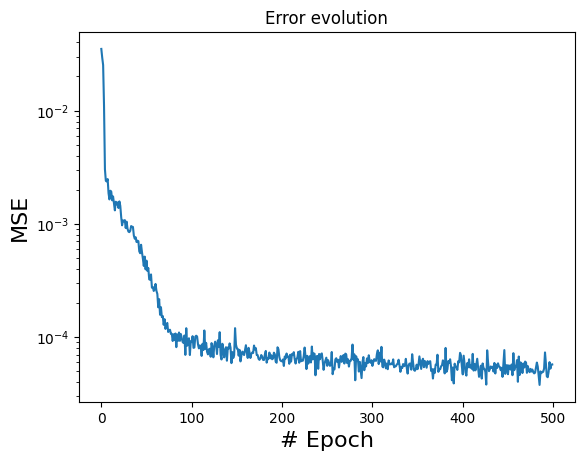

In [4]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(mlpr.loss_curve_)
#use a logarithmic scale for the y axis
plt.yscale('log')

plt.title('Error evolution')
plt.ylabel('MSE', fontsize=16)
plt.xlabel('# Epoch', fontsize=16)
plt.show()

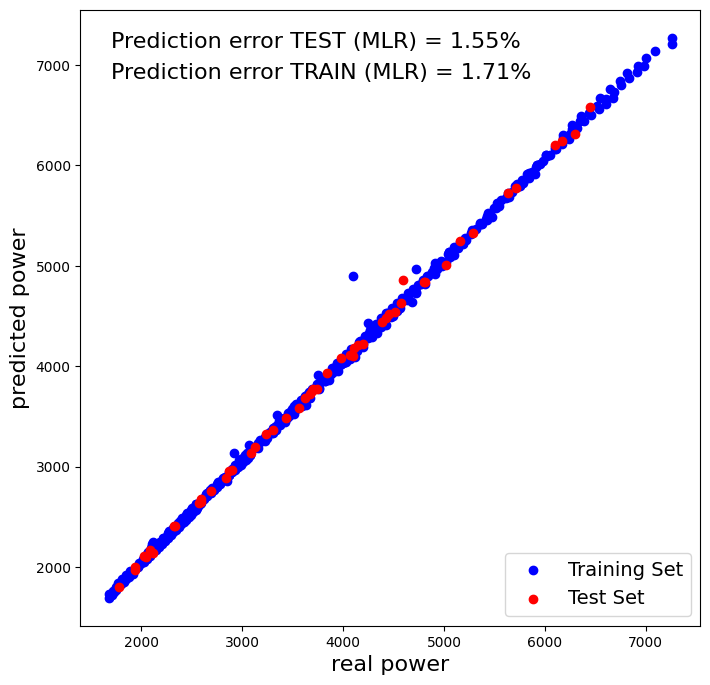

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the training set scatter with blue color
ax.scatter(z_train, pred_nn_train, c='blue', label='Training Set')

# Plot the test set scatter with red color
ax.scatter(z_test, pred_nn_test, c='red', label='Test Set')

ax.set_xlabel("real power", fontsize=16)
ax.set_ylabel("predicted power", fontsize=16)

ax.text(0.05, 0.9, "Prediction error TEST (MLR) = %.2f%%\n" % err_nn_train, transform=ax.transAxes, fontsize=16)
ax.text(0.05, 0.85, "Prediction error TRAIN (MLR) = %.2f%%\n" % err_nn_test, transform=ax.transAxes, fontsize=16)

# Add a legend to the plot
ax.legend(loc='lower right', fontsize=14)

#fig.savefig("turbine-mlr-test.png", bbox_inches='tight')
plt.show()